<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/multiple_farms_work_good_for_two_adv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equation of the trend line for Data 1: y = -0.000191x + 0.333127
Equation of the trend line for Data 2: y = -0.000790x + 0.520311
Percentage change over the given time period for Data 1: -14.55%
Percentage change over the given time period for Data 2: -25.26%


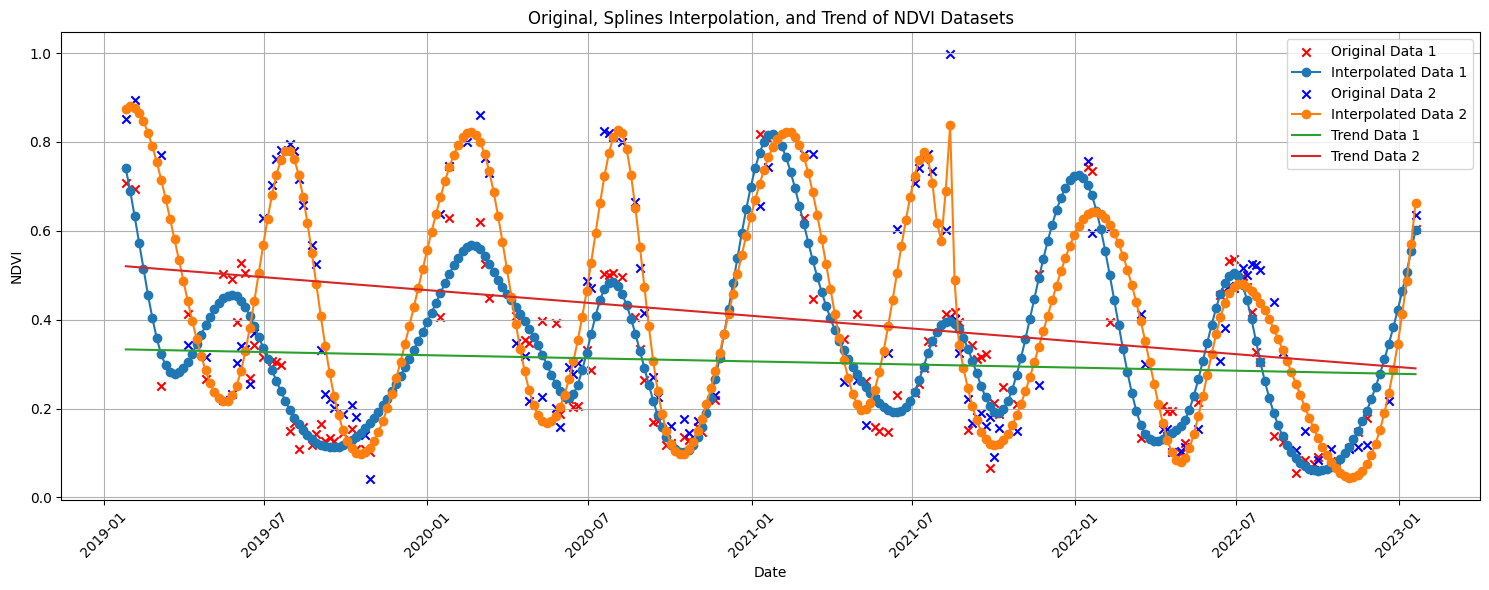

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

# Load the first CSV file
df1 = pd.read_csv('/content/S2-2019-JAN2023.csv')

# Load the second CSV file
df2 = pd.read_csv('/content/ndvi-1-adapt.csv')  # Replace with the path to your second CSV file

# Convert the "Date" column to datetime for both DataFrames
df1["Date"] = pd.to_datetime(df1["Date"])
df2["Date"] = pd.to_datetime(df2["Date"])

# Set the "Date" column as the index for both DataFrames
df1 = df1.set_index("Date")
df2 = df2.set_index("Date")

# Resample the data to handle duplicate date labels (e.g., calculating the mean for duplicate dates)
df1 = df1.resample("5D").mean()
df2 = df2.resample("5D").mean()

# Replace missing values with NaN for both DataFrames
df1["NDVI"] = df1["NDVI"].replace(0, np.nan)
df2["NDVI"] = df2["NDVI"].replace(0, np.nan)

# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df1))
mask1 = ~np.isnan(df1["NDVI"])
mask2 = ~np.isnan(df2["NDVI"])
s_values = [0.35]

interpolated_values1 = []
interpolated_values2 = []

spline1 = UnivariateSpline(x[mask1], df1["NDVI"][mask1], k=3, s=s)
interpolated_values1.append(spline1(x))

spline2 = UnivariateSpline(x[mask2], df2["NDVI"][mask2], k=3, s=s)
interpolated_values2.append(spline2(x))

# Reset the index and rename the columns for both DataFrames
df1 = df1.reset_index()
df1 = df1.rename(columns={"index": "Date"})

df2 = df2.reset_index()
df2 = df2.rename(columns={"index": "Date"})

# Remove rows with missing values for both DataFrames
df1_trend = df1.dropna()
df2_trend = df2.dropna()

# Calculate the trend using linear regression for both DataFrames
X1 = df1_trend.index.values.reshape(-1, 1)
y1 = df1_trend["NDVI"]
model1 = LinearRegression()
model1.fit(X1, y1)
trend1 = model1.predict(X1)

X2 = df2_trend.index.values.reshape(-1, 1)
y2 = df2_trend["NDVI"]
model2 = LinearRegression()
model2.fit(X2, y2)
trend2 = model2.predict(X2)

# Print the equations of the trend lines for both DataFrames
slope1 = model1.coef_[0]
intercept1 = model1.intercept_
print("Equation of the trend line for Data 1: y = {:.6f}x + {:.6f}".format(slope1, intercept1))

slope2 = model2.coef_[0]
intercept2 = model2.intercept_
print("Equation of the trend line for Data 2: y = {:.6f}x + {:.6f}".format(slope2, intercept2))

# Calculate the percentage change of the NDVI values over the given time period for both DataFrames
initial_ndvi1 = df1_trend["NDVI"].iloc[0]
final_ndvi1 = df1_trend["NDVI"].iloc[-1]
percentage_change1 = ((final_ndvi1 - initial_ndvi1) / initial_ndvi1) * 100
print("Percentage change over the given time period for Data 1: {:.2f}%".format(percentage_change1))

initial_ndvi2 = df2_trend["NDVI"].iloc[0]
final_ndvi2 = df2_trend["NDVI"].iloc[-1]
percentage_change2 = ((final_ndvi2 - initial_ndvi2) / initial_ndvi2) * 100
print("Percentage change over the given time period for Data 2: {:.2f}%".format(percentage_change2))

# Create a DataFrame with the interpolated values and corresponding dates for both DataFrames
interpolated_df1 = pd.DataFrame({"Date": df1["Date"], "NDVI": interpolated_values1[0]})
interpolated_df2 = pd.DataFrame({"Date": df2["Date"], "NDVI": interpolated_values2[0]})

# Save the DataFrames to CSV files
interpolated_df1.to_csv("/content/interpolated_data1.csv", index=False)
interpolated_df2.to_csv("/content/interpolated_data2.csv", index=False)

# Plot the original data, interpolated values, and trend for both DataFrames
plt.figure(figsize=(15, 6))
plt.scatter(df1["Date"], df1["NDVI"], marker="x", label="Original Data 1", color="red")
plt.plot(df1["Date"], interpolated_values1[0][:len(df1)], "o-", label="Interpolated Data 1")

plt.scatter(df2["Date"], df2["NDVI"], marker="x", label="Original Data 2", color="blue")
plt.plot(df2["Date"], interpolated_values2[0][:len(df2)], "o-", label="Interpolated Data 2")

plt.plot(df1_trend["Date"], trend1, label="Trend Data 1")
plt.plot(df2_trend["Date"], trend2, label="Trend Data 2")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Splines Interpolation, and Trend of NDVI Datasets")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
